In [ ]:
import numpy as np
import pandas as pd
import csv
from pandas import *
from sklearn import model_selection 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [56]:
train_df = pd.read_csv("C:/Users/jyots/Desktop/jyots/bigdata/bigdataproject/titanic/train.csv")


train_df.head(10)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


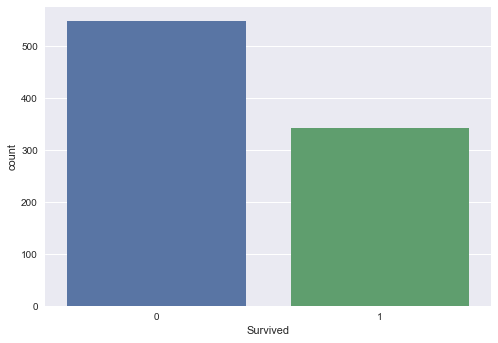

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x="Survived",data=train_df)
plt.show()

In [57]:
cols = ["Pclass","Sex","Age"]
train_df["Age"]=train_df["Age"].fillna(train_df["Age"].mean())
train_df["Fare"]=train_df["Fare"].fillna(train_df["Fare"].mean())


In [58]:
train_df["Sex"]=train_df["Sex"].apply(lambda sex: 0 if sex == "male" else 1)
traindf2=train_df[cols]
traindf2.tail(10)

,Pclass,Sex,Age
881,3,0,33.000000
882,3,1,22.000000
883,2,0,28.000000
884,3,0,25.000000
885,3,1,39.000000
886,2,0,27.000000
887,1,1,19.000000
888,3,1,29.699118
889,1,0,26.000000
890,3,0,32.000000


In [62]:
X=train_df[cols]
Y=train_df["Survived"]
train_df["Sex"].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [15]:
cols = ["Pclass","Sex","Age"]
data=train_df[cols].values
print(data)

[[  3.           0.          22.        ]
 [  1.           1.          38.        ]
 [  3.           1.          26.        ]
 ..., 
 [  3.           1.          29.69911765]
 [  1.           0.          26.        ]
 [  3.           0.          32.        ]]


In [63]:
import statsmodels.api as sm
log_mod=sm.Logit(exog=X,endog= Y)
result=log_mod.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.467947
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      888
Method:                           MLE   Df Model:                            2
Date:                Thu, 14 Dec 2017   Pseudo R-squ.:                  0.2973
Time:                        18:46:23   Log-Likelihood:                -416.94
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 2.490e-77
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.6750      0.067    -10.041      0.000      -0.807      -0.543
Sex            2.6874      0.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn import metrics

lr = LogisticRegression(solver='liblinear')
predicted = model_selection.cross_val_predict(lr,data, train_df['Survived'])
print (metrics.accuracy_score( train_df['Survived'], predicted))

0.79012345679


In [17]:
test_df = pd.read_csv("C:/Users/jyots/Desktop/jyots/bigdata/bigdataproject/titanic/test.csv")


test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [18]:
cols = ["Pclass","Sex","Age"]
test_df["Age"]=test_df["Age"].fillna(test_df["Age"].mean())
test_df["Fare"]=test_df["Fare"].fillna(test_df["Fare"].mean())
test_df.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [19]:
test_df["Sex"]=test_df["Sex"].apply(lambda sex: 0 if sex == "male" else 1)
testdf2=test_df[cols]
testdf2.tail(10)

,Pclass,Sex,Age
408,3,1,30.27259
409,3,1,3.00000
410,3,1,30.27259
411,1,1,37.00000
412,3,1,28.00000
413,3,0,30.27259
414,1,1,39.00000
415,3,0,38.50000
416,3,0,30.27259
417,3,0,30.27259


In [25]:
x = train_df[cols].values
y = train_df['Survived'].values


In [29]:
xTest = test_df[cols].values
lr.fit(x,y)
predicted = lr.predict(xTest)

In [ ]:

lr.fit(x,y)
predicted = lr.predict(xTest)
print (metrics.accuracy_score(yTest, predicted))

In [31]:
resultDF = test_df.assign(prediction=predicted)
cols1=["PassengerId","prediction"]
result=resultDF[cols1]
result.head(30)

,PassengerId,prediction
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
